In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import os

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [4]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)

rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))



First we look at the quintiles of rainfall at each volcano site, and see where eruptions fall.

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_92488/159018300.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_92488/159018300.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_92488/159018300.py:14: SettingWithCopyWarning: 
A value

([<matplotlib.axis.YTick at 0x7fe6f2a4fe50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

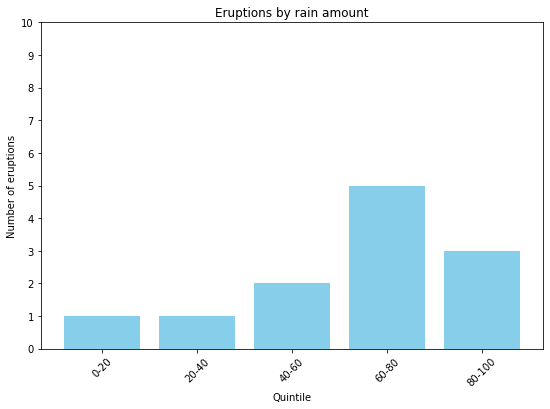

In [27]:
# Combine all
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05), 'Alcedo': (-91.15, -.45)}
picks = volcanos #name volcano(s)

plt.figure(figsize=(9,6))

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,0,0,0,0]

# Across all years
for i in picks:
    erupt_dates = np.array(eruptions['Start'][(eruptions['Volcano'] == i) & (eruptions['Start'] >= '2000')])
    rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[i][0]) & (rainfall['Latitude'] == volcanos[i][1])]
    rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
    rolling_rain = rolling_rain.dropna()    
    all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
    fifth = len(all_rain) // 5
    for l in erupt_dates:
        values[all_rain.index(l) // fifth] += 1                 
        
plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.xticks(rotation=45) 
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#Plot the top two quintiles

It seems like there is somewhat of a correlation. Let's look further into each volcano site. There is some regularity to a notion of rainy season, at the volcano sites, so if there is an extended period of years where rainfall is low, a volcano that erupts in a rainy period relative to the dry spell may not appear high in the histogram.

2005-05-13 4
2009-04-10 4
2017-09-04 1
2018-06-16 3
2020-01-12 0


/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_99824/1491542201.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()


([<matplotlib.axis.YTick at 0x7ff31691b610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

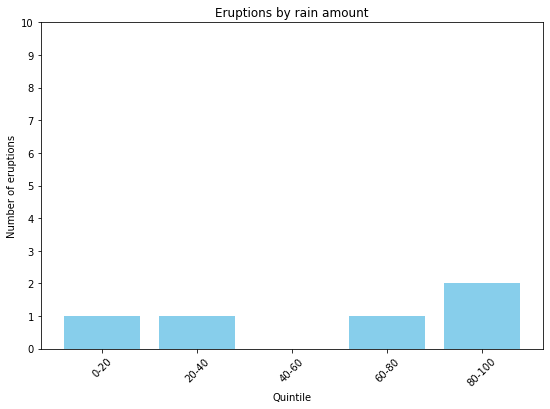

In [6]:
#Does the histogram by year

volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05), 'Alcedo': (-91.15, -.45)}
picks = ['Fernandina'] #name a volcano
rain_start = '11-01'
rain_end = '10-31'

plt.figure(figsize=(9,6))

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,0,0,0,0]
top_twenty = []

# By year
for pick in picks:
    erupt_dates = np.array(eruptions['Start'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])]
    rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
    rolling_rain = rolling_rain.dropna()
    for k in range(24):
            year = 2000 + k
            yearly_rain = rolling_rain[(rolling_rain['Date'] >= str(year) + '-' + rain_start) & (rolling_rain['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll90'])
            all_rain = list(yearly_rain['Date'])
            for l in erupt_dates:
                if l in all_rain:
                    print(l, all_rain.index(l) // 73)
                    # if all_rain.index(l) // 73 == 4:
                    #       top_twenty.append(l)
                    values[all_rain.index(l) // 73] += 1

# Across all years
# all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
# fifth = len(all_rain) // 5
# for l in erupt_dates:
#     values[all_rain.index(l) // fifth] += 1                 
        
plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.xticks(rotation=45) 
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])



Two of the eruptions for Fernandina from the 60-80 percentile jumped to the 80-100 percentile when considering seasonal effects. For Sierra Negra, a eruption in the 0-20 percentile jumps up one, as does the one in the 60-80 percentile. Lets try and get a better picture of why this is so.

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_92488/2736981045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_92488/2736981045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)


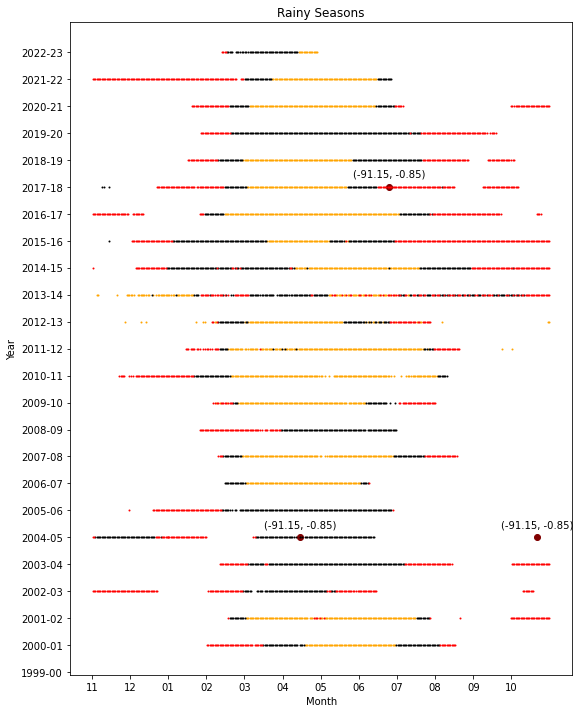

In [33]:
# Generates the rainy season plot
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05), 'Alcedo': (-91.15, -.45)}
pick = 'Negra, Sierra'

rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])]
rain_start = '11-01'
rain_end = '10-31'
rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)
rolling_galapagos = rolling_galapagos.dropna()

plt.figure(figsize=(9,12))

erupt_dates = np.array(eruptions['Decimal'][(eruptions['Start'] >= '2004-11-01') & (eruptions['Volcano'] == pick)])
volc_x = [((i + (2/12)) % 1) for i in erupt_dates]
volc_y = [(i + (2/12)) // 1 for i in erupt_dates]
labels = list(eruptions['Volcano'][(eruptions['Start'] >= '2004-11-01') & (eruptions['Volcano'] == pick)])
plt.scatter(volc_x, volc_y, color='maroon')
for i in range(len(volc_x)):
    plt.annotate(volcanos[labels[i]], (volc_x[i], volc_y[i]), textcoords="offset points", xytext=(0,10), ha='center')

dormant_days = pd.DataFrame()
# for i in erupt_dates:
#     dormant_days = dormant_days.append(rolling_galapagos[(rolling_galapagos['Decimal'] > i) & (rolling_galapagos['Decimal'] < i + .75)])
# removals = list(dormant_days['Decimal'])
# rolling_galapagos = rolling_galapagos[~rolling_galapagos['Decimal'].isin(removals)]
dates = rolling_galapagos.sort_values(by=['roll90'])['Decimal']
x = np.array((dates + (2/12)) % 1)
y = np.array((dates + (2/12)) // 1)
bin_size = len(x) // 5
plt.scatter(x[-bin_size:], y[-bin_size:], color='orange', s =1)
plt.scatter(x[-(2*bin_size):-bin_size], y[-(2*bin_size):-bin_size], color='black', s =1)
plt.scatter(x[-(3*bin_size):-(2*bin_size)], y[-(3*bin_size):-(2*bin_size)], color='red', s =1)
# plt.scatter(x[-6688:-5016], y[-6688:-5016], color='green', s =1)
# for i in erupt_dates:
#     print(i, list(dates).index(i) // 1672)


plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.show() 

For 2005 and 2009 Fernandina, they occur during fairly dry years. And within that, they occur at the rainiest time. So these fall into our framework more so, and we will take them as further evidence that these are actually occuring due to rainfall. For Sierra Negra, The two that occur in 2005, occur in the midst of a three year period that is pretty dry. So the first one in 2005 still falls quite strongly into our framework. So that justifies the hump in the 60-80 period. The lowest Sierra Negra one changes slightly but that one is not of huge consequence.

In [ ]:
#Just to see after modifying

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,2,2,2,6]

plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.xticks(rotation=45) 
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])

In [10]:
eruptions = eruptions.drop(5)
print(eruptions)

          Volcano       Start         End  Max Explosivity During El Nino  \
0      Fernandina  1961-03-21  1961-09-16                2              n   
1            Wolf  1963-03-04  1963-03-16                0              n   
2   Negra, Sierra  1963-04-13  1963-05-16                2              n   
3     Azul, Cerro  1967-08-09        None                2              n   
4      Fernandina  1968-05-21  1968-05-23                2              n   
6      Fernandina  1972-06-04        None                0              y   
7      Fernandina  1973-12-09  1973-12-16                2              n   
8      Fernandina  1977-03-23  1977-03-27                1              y   
9      Fernandina  1978-08-08  1978-08-26                2              n   
10    Azul, Cerro  1979-01-29  1979-03-04                2              n   
11  Negra, Sierra  1979-11-13  1980-01-14                3              n   
12     Fernandina  1981-08-01        None                0              n   

In [12]:
#make recurrences
recurrences = {'Fernandina': 0, 'Azul, Cerro': 0, 'Negra, Sierra': 0, 'Wolf': 0, 'Alcedo': 0}

for i in volcanos:
    dates = np.array(eruptions['Decimal'][eruptions['Volcano'] == i])
    recurrences[i] = (dates[-1] - dates[0]) / (len(dates) - 1)

print(recurrences)


{'Fernandina': 3.9209133333333286, 'Azul, Cerro': 12.39590000000004, 'Negra, Sierra': 11.040539999999964, 'Wolf': 19.614599999999957, 'Alcedo': nan}


/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_99824/3654928969.py:6: RuntimeWarning: invalid value encountered in double_scalars
  recurrences[i] = (dates[-1] - dates[0]) / (len(dates) - 1)


In [30]:
# # Combine all

# #volcanos = {'Fernandina': (-91.55, -.35, .5), 'Azul, Cerro': (-91.35, -.95, 2), 'Negra, Sierra': (-91.15, -.85, 2), 'Wolf': (-91.35, .05, 2), 'Alcedo': (-91.15, -.45, 2)}
# volcanos = {'Fernandina': (-91.55, -.35, .5), 'Azul, Cerro': (-91.35, -.95, 2), 'Negra, Sierra': (-91.15, -.85, .5), 'Wolf': (-91.35, .05, 2)}
# picks = volcanos #['Negra, Sierra'] #name a volcano
# rain_start = '11-01'
# rain_end = '10-31'
# plt.figure(figsize=(9,6))

# categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
# values = [0,0,0,0,0]

# # Across all years
# for i in picks:
#     erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == i) & (eruptions['Start'] >= '2000')])
#     rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[i][0]) & (rainfall['Latitude'] == volcanos[i][1])]
#     rolling_rain['Decimal'] = rolling_rain.Date.apply(date_to_decimal_year)
#     rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
#     rolling_rain = rolling_rain.dropna() 
#     dormant_days = pd.DataFrame()
#     for j in erupt_dates:
#         dormant_days = dormant_days.append(rolling_rain[(rolling_rain['Decimal'] > j) & (rolling_rain['Decimal'] < j + volcanos[i][2])])
#     removals = list(dormant_days['Decimal'])
#     rolling_rain = rolling_rain[~rolling_rain['Decimal'].isin(removals)]
#     dates = list(rolling_rain.sort_values(by=['roll90'])['Decimal'])
#     fifth = len(dates) // 5
#     for l in erupt_dates:
#         values[dates.index(l) // fifth] += 1                 
        
# plt.bar(categories, values, color='skyblue')
# plt.xlabel("Quintile")
# plt.ylabel("Number of eruptions")
# plt.title("Eruptions by rain amount")
# plt.xticks(rotation=45) 
# plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
